In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import csv


In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/email.csv', encoding='ISO-8859-1')
# Convert labels to binary values (0 for ham, 1 for spam)
data['v1'] = data['v1'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and labels (y)
X = data['v2']
y = data['v1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(data)

      v1                                                 v2 Unnamed: 2  \
0      0  Go until jurong point, crazy.. Available only ...        NaN   
1      0                      Ok lar... Joking wif u oni...        NaN   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      0  U dun say so early hor... U c already then say...        NaN   
4      0  Nah I don't think he goes to usf, he lives aro...        NaN   
...   ..                                                ...        ...   
5567   1  This is the 2nd time we have tried 2 contact u...        NaN   
5568   0              Will Ì_ b going to esplanade fr home?        NaN   
5569   0  Pity, * was in mood for that. So...any other s...        NaN   
5570   0  The guy did some bitching but I acted like i'd...        NaN   
5571   0                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        N

In [ ]:
# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# Create a Multinomial Naive Bayes classifier and train it on the vectorized training data
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9838565022421525
Confusion Matrix:
 [[963   2]
 [ 16 134]]


In [ ]:
pip install pandas scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Apply TF-IDF transformation to the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Initialize the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train_tfidf, y_train)

# Predict on the test data
svm_y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("SVM Classification Report:\n", svm_class_report)

SVM Accuracy: 0.9802690582959641
SVM Confusion Matrix:
 [[965   0]
 [ 22 128]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.85      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Train the Random Forest model
rf_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
rf_y_pred = rf_model.predict(X_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)
print("Random Forest Classification Report:\n", rf_class_report)

Random Forest Accuracy: 0.9775784753363229
Random Forest Confusion Matrix:
 [[965   0]
 [ 25 125]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
pip install matplotlib seaborn

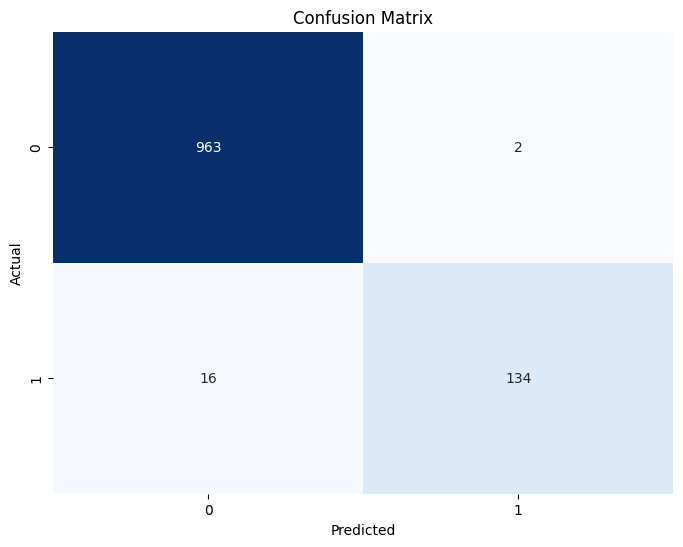

<ipython-input-12-f81ef570bb65>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


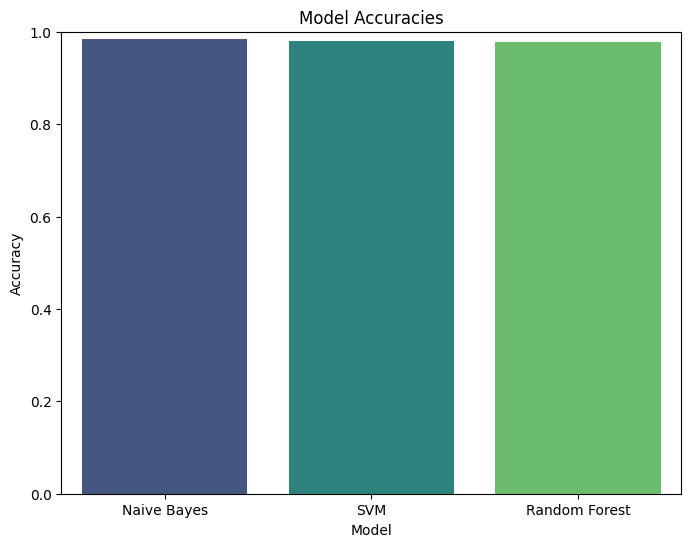

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create an accuracy bar plot
models = ['Naive Bayes', 'SVM', 'Random Forest']
accuracies = [accuracy, svm_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0, 1)
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

In [ ]:
# Example prediction
new_emails = [
    "Ok lar... Joking wif u oni...",
    "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
    "Click the link to claim your prize!"
]

new_emails_vectorized = vectorizer.transform(new_emails)
predictions = model.predict(new_emails_vectorized)

for email, prediction in zip(new_emails, predictions):
    if prediction == 0:
        label = 'ham'
    else:
        label = 'spam'
    print(f"Email: {email}\nPrediction: {label}\n")

Email: Ok lar... Joking wif u oni...
Prediction: ham

Email: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Prediction: spam

Email: Click the link to claim your prize!
Prediction: spam

